##### B.Rohith kumar AP21110010795
##### V.Sreeroop AP21110010831
##### U. Revanth AP21110010834
##### I.Vinay Datta AP21110010924
##### K.Hemanth AP21110010949

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.flterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *




In [3]:
data=pd.read_csv("uber_data.csv")
data


# Convert categorical variables to numerical format
label_encoder = LabelEncoder()
data['VendorID'] = label_encoder.fit_transform(data['VendorID'])
data['RatecodeID'] = label_encoder.fit_transform(data['RatecodeID'])
data['store_and_fwd_flag'] = label_encoder.fit_transform(data['store_and_fwd_flag'])
data['payment_type'] = label_encoder.fit_transform(data['payment_type'])
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               29999 non-null  int64         
 1   tpep_pickup_datetime   29999 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  29999 non-null  datetime64[ns]
 3   passenger_count        29999 non-null  int64         
 4   trip_distance          29999 non-null  float64       
 5   pickup_longitude       29999 non-null  float64       
 6   pickup_latitude        29999 non-null  float64       
 7   RatecodeID             29999 non-null  int64         
 8   store_and_fwd_flag     29999 non-null  int32         
 9   dropoff_longitude      29999 non-null  float64       
 10  dropoff_latitude       29999 non-null  float64       
 11  payment_type           29999 non-null  int32         
 12  fare_amount            29999 non-null  float64       
 13  e

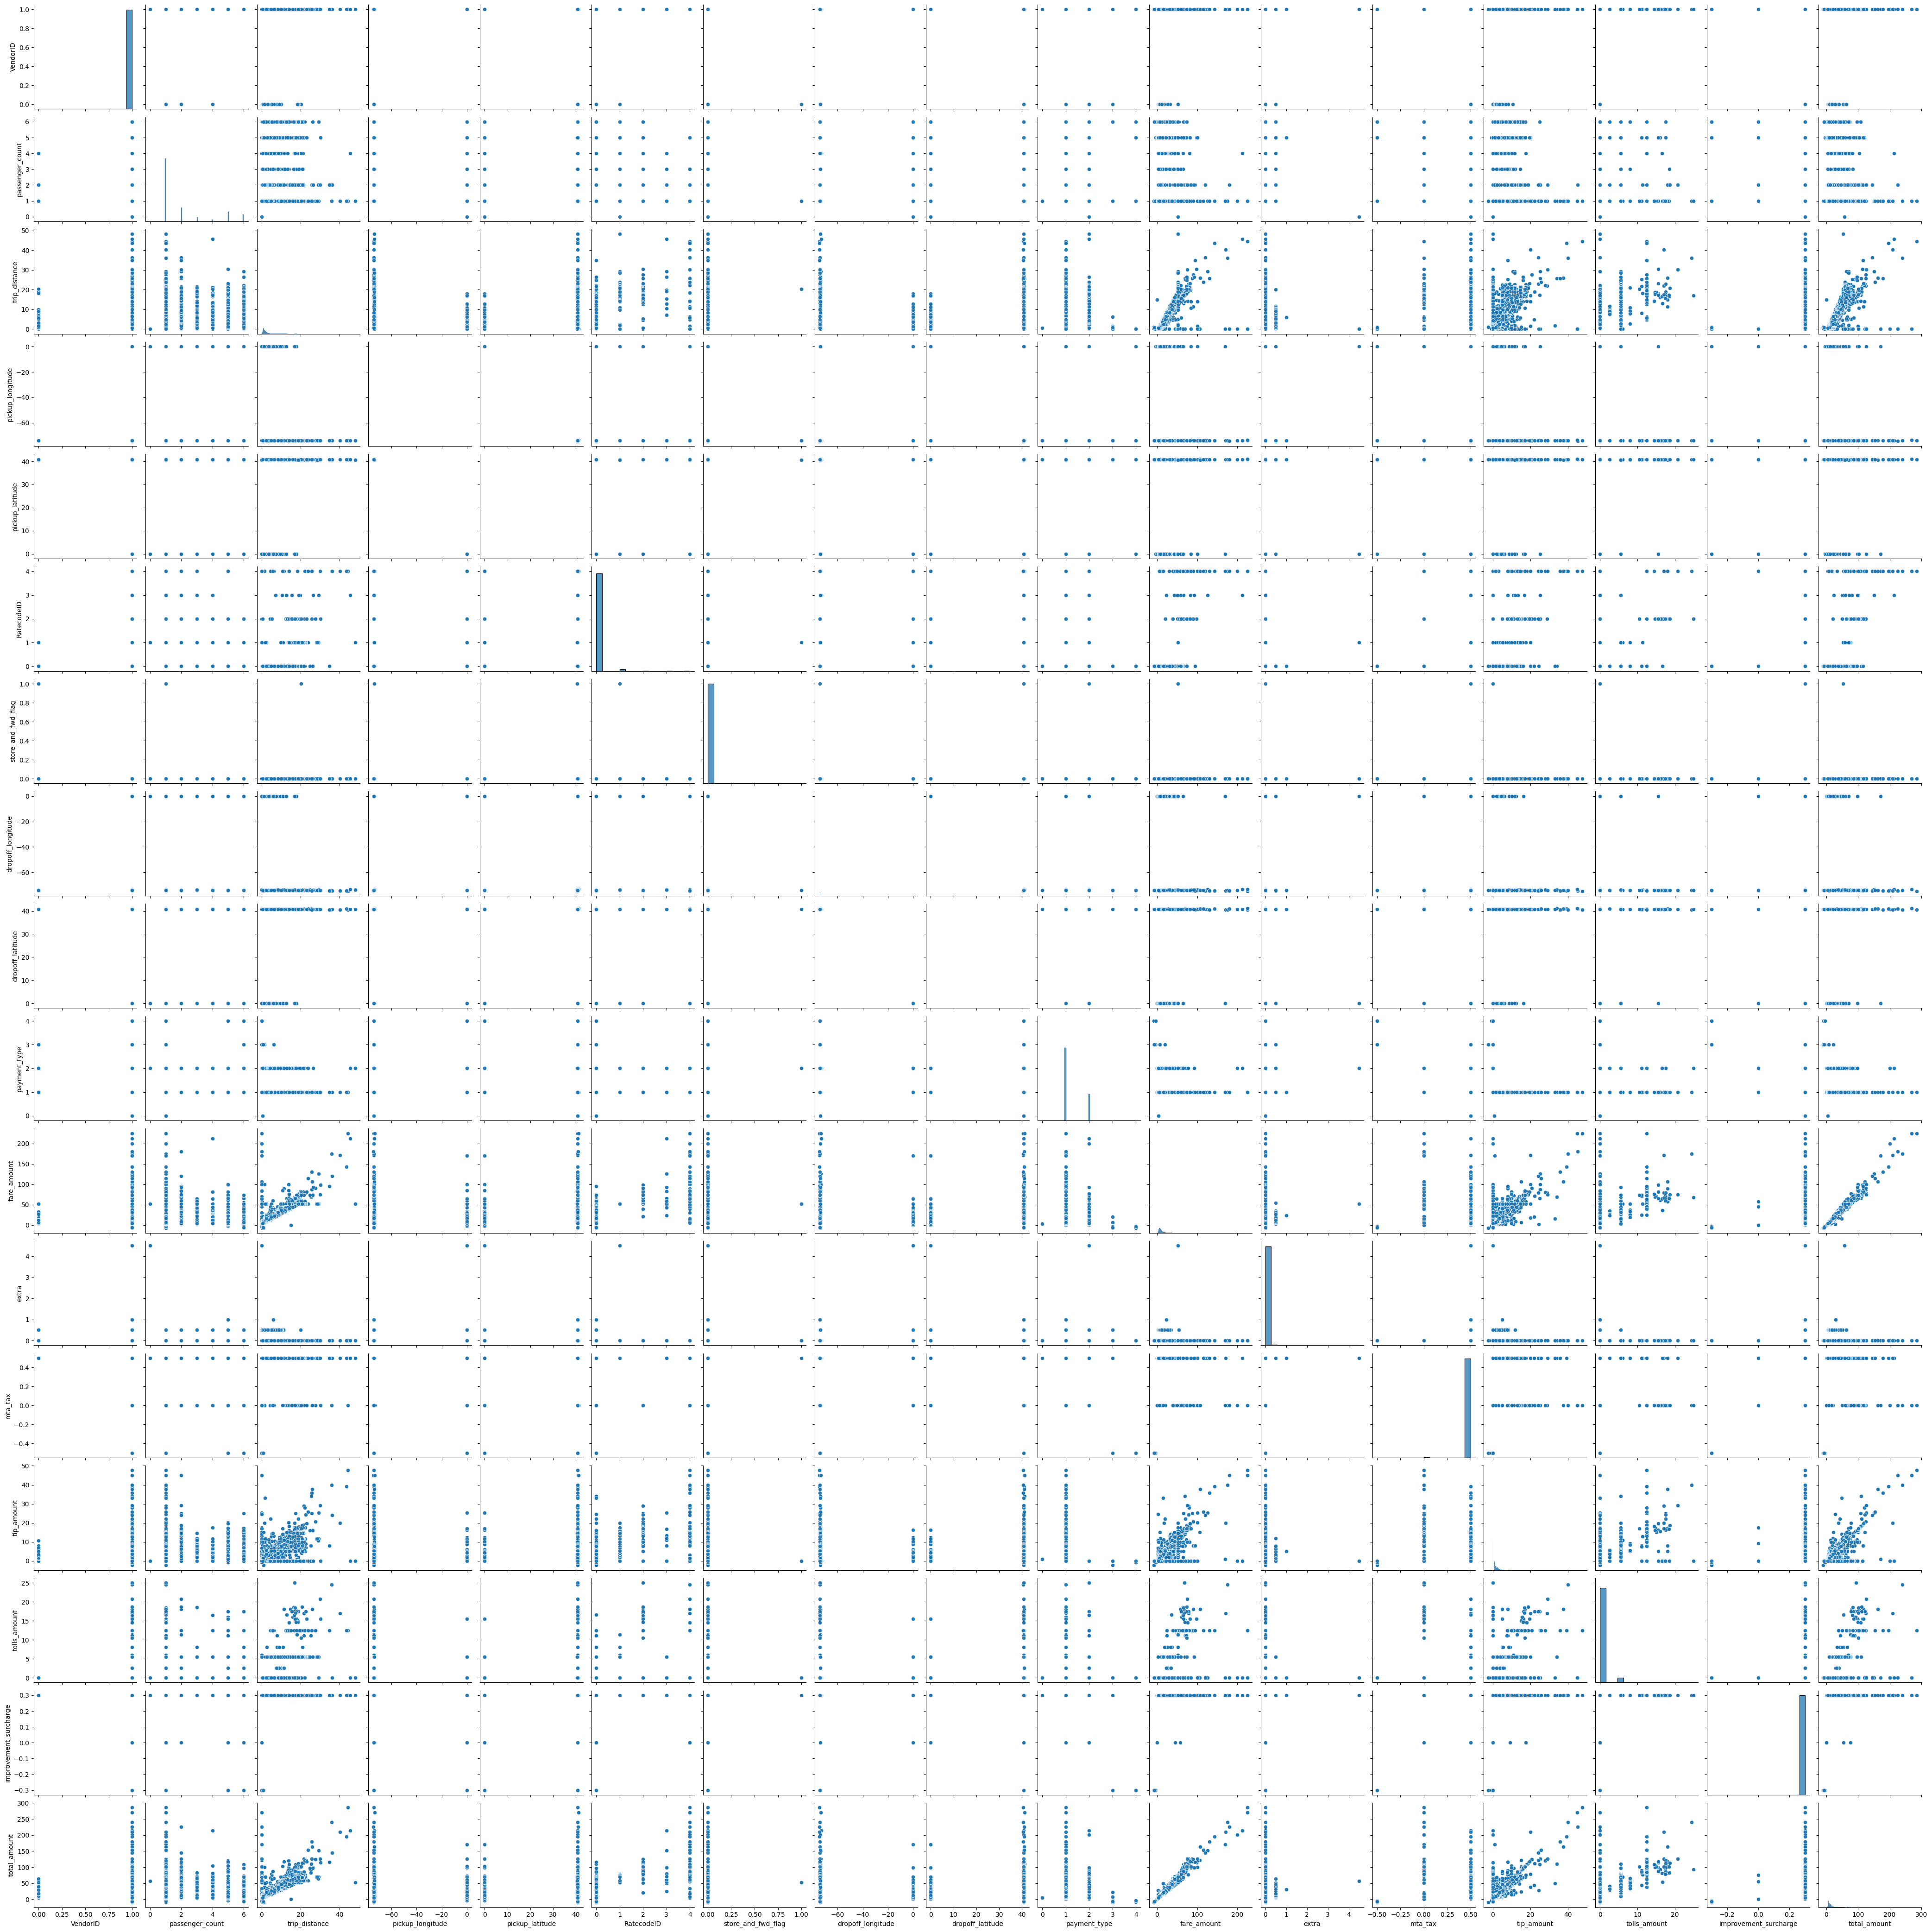

In [5]:
# Visualizing the distribution of numerical variables
sns.pairplot(data)
plt.show()


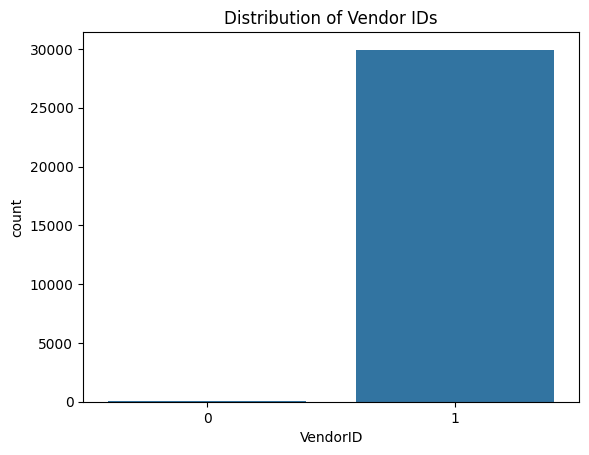

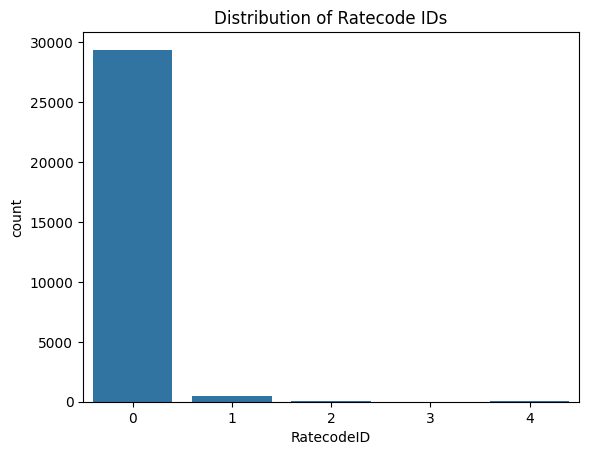

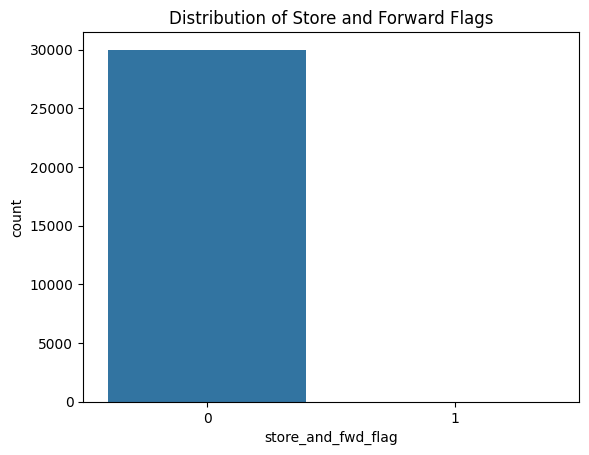

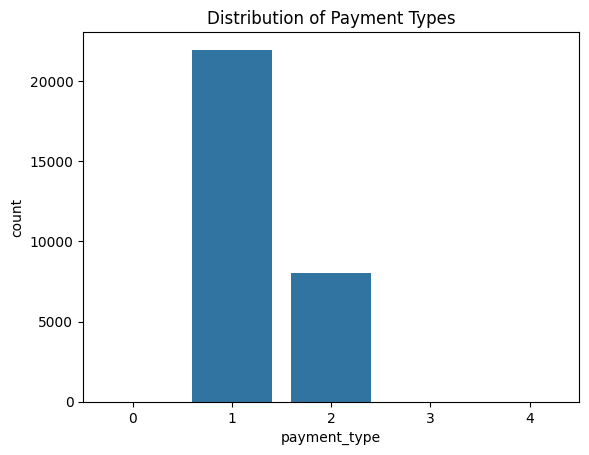

In [6]:
# Visualizing the distribution of categorical variables
sns.countplot(x='VendorID', data=data)
plt.title('Distribution of Vendor IDs')
plt.show()

sns.countplot(x='RatecodeID', data=data)
plt.title('Distribution of Ratecode IDs')
plt.show()

sns.countplot(x='store_and_fwd_flag', data=data)
plt.title('Distribution of Store and Forward Flags')
plt.show()

sns.countplot(x='payment_type', data=data)
plt.title('Distribution of Payment Types')
plt.show()


In [7]:
data=data.drop(columns=["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               29999 non-null  int64  
 1   passenger_count        29999 non-null  int64  
 2   trip_distance          29999 non-null  float64
 3   pickup_longitude       29999 non-null  float64
 4   pickup_latitude        29999 non-null  float64
 5   RatecodeID             29999 non-null  int64  
 6   dropoff_longitude      29999 non-null  float64
 7   dropoff_latitude       29999 non-null  float64
 8   payment_type           29999 non-null  int32  
 9   fare_amount            29999 non-null  float64
 10  extra                  29999 non-null  float64
 11  mta_tax                29999 non-null  float64
 12  tip_amount             29999 non-null  float64
 13  tolls_amount           29999 non-null  float64
 14  improvement_surcharge  29999 non-null  float64
 15  to

In [9]:
# count of nulls
data.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [10]:
# count of duplicates
data.duplicated().sum()

6

In [11]:
# removing duplicates
data.drop_duplicates(inplace=True)

In [12]:
# count of duplicates
data.duplicated().sum()

0

In [13]:
# shape of dataframe after removing duplicates
data.shape

(29993, 16)

In [14]:
# Statiscal summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,29993.0,0.997733,0.047562,0.000000,1.000000,1.000000,1.000000,1.000000
passenger_count,29993.0,2.021105,1.654525,0.000000,1.000000,1.000000,2.000000,6.000000
trip_distance,29993.0,2.655719,3.272309,0.000000,0.980000,1.600000,2.730000,48.180000
pickup_longitude,29993.0,-73.396366,6.508575,-74.651306,-73.990837,-73.978836,-73.962112,0.000000
pickup_latitude,29993.0,40.437290,3.585912,0.000000,40.741543,40.756470,40.772385,41.051239
RatecodeID,29993.0,0.028973,0.239603,0.000000,0.000000,0.000000,0.000000,4.000000
dropoff_longitude,29993.0,-73.403348,6.481114,-74.651306,-73.990677,-73.978828,-73.968384,0.000000
dropoff_latitude,29993.0,40.437886,3.570496,0.000000,40.741112,40.755589,40.766026,41.051239
payment_type,29993.0,1.269196,0.446023,0.000000,1.000000,1.000000,2.000000,4.000000
fare_amount,29993.0,12.304743,10.138337,-7.500000,6.500000,9.500000,14.000000,225.000000


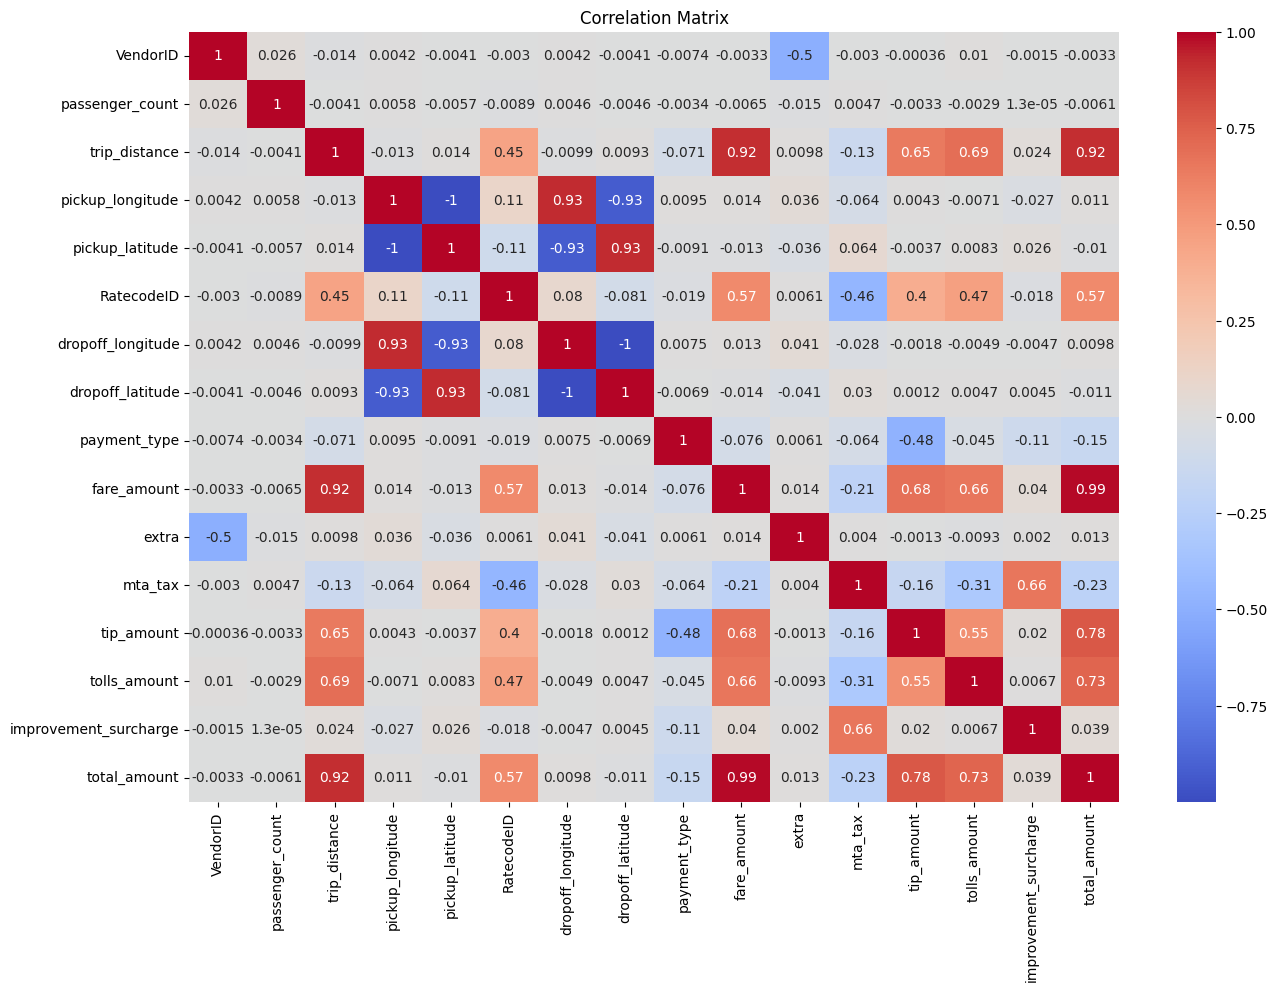

In [15]:
# Correlation matrix
correlation_matrix = data.corr()
fig, ax =plt.subplots(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

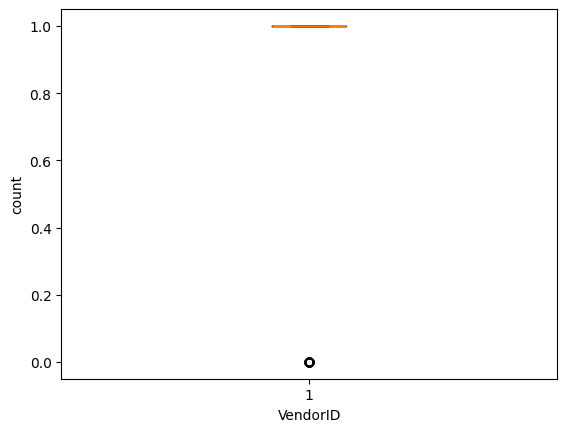

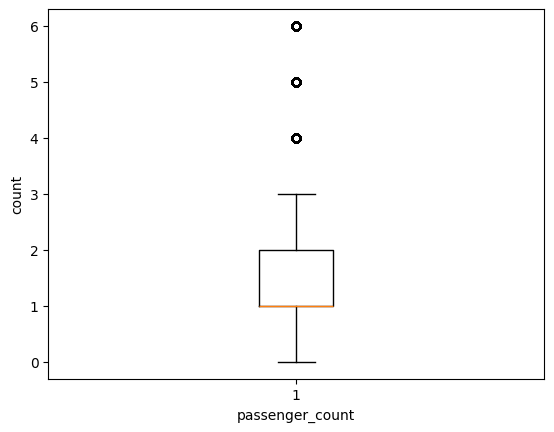

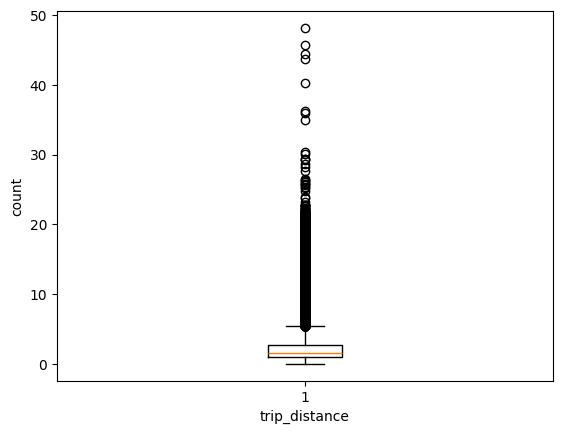

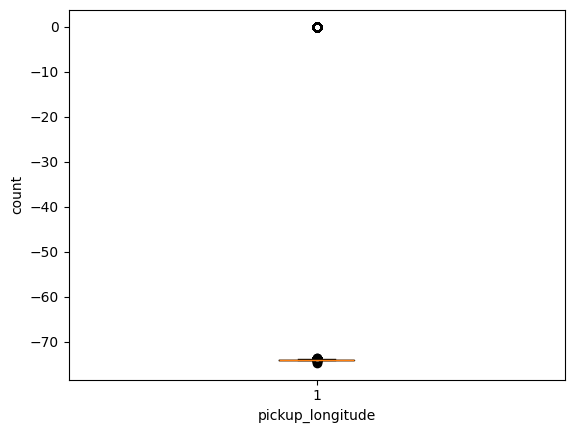

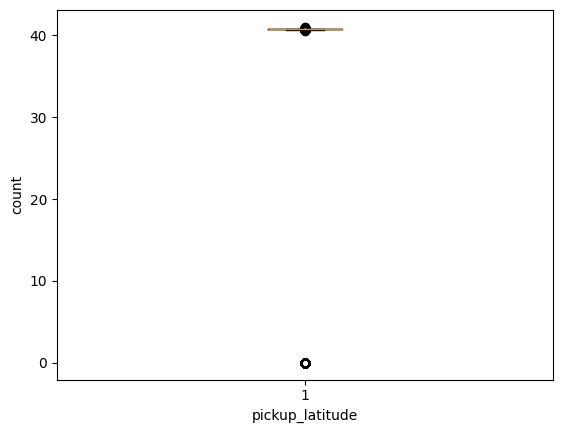

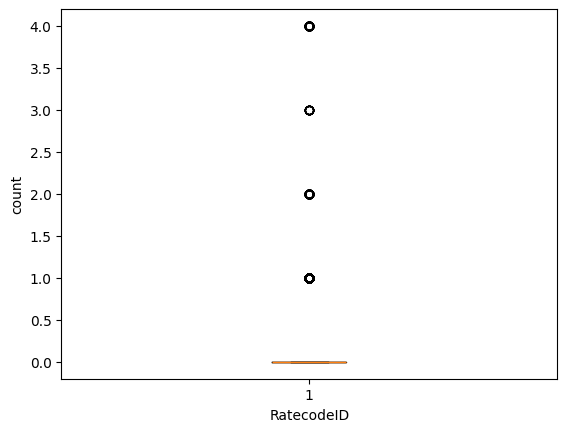

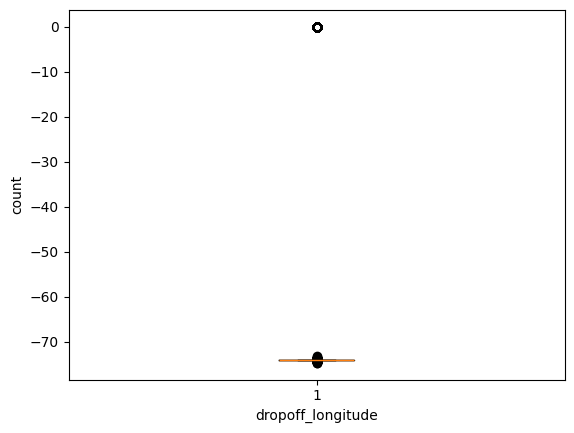

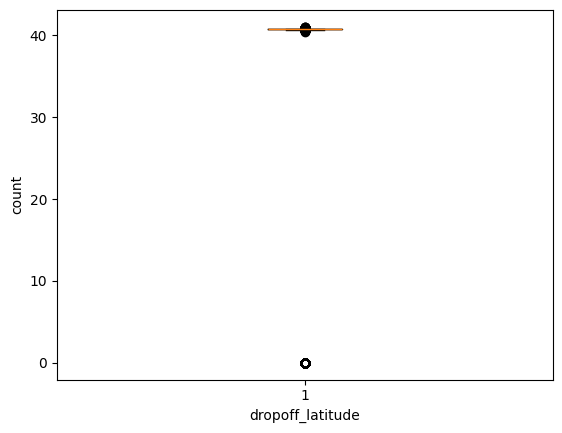

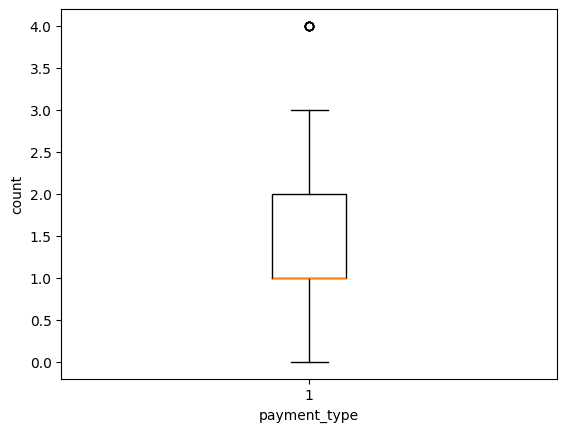

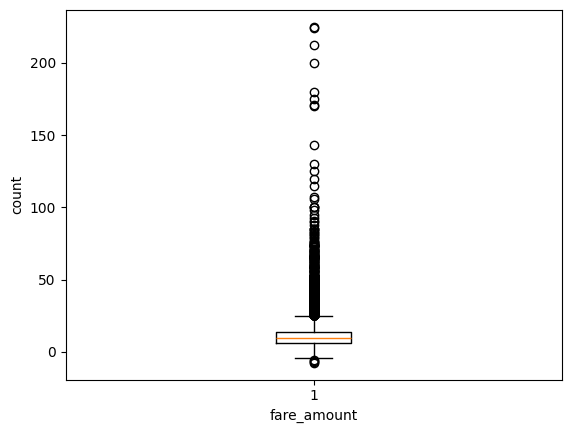

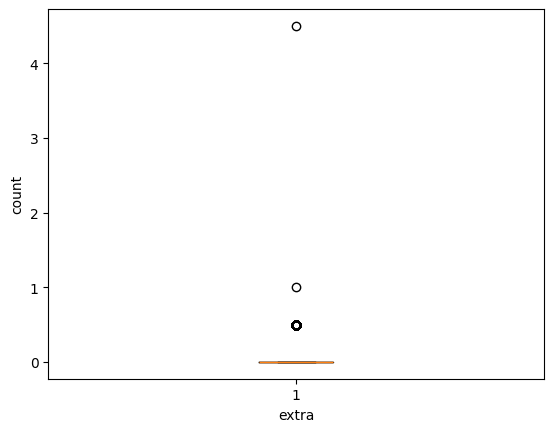

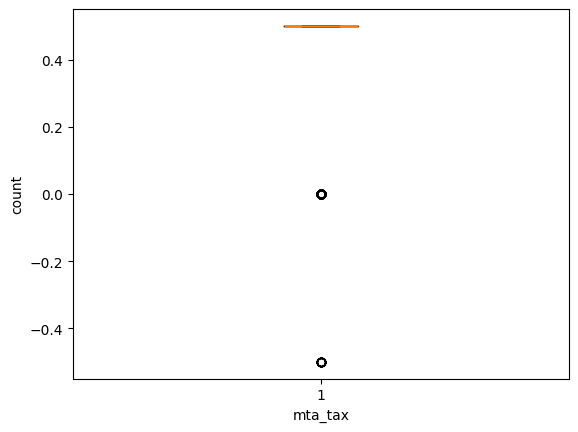

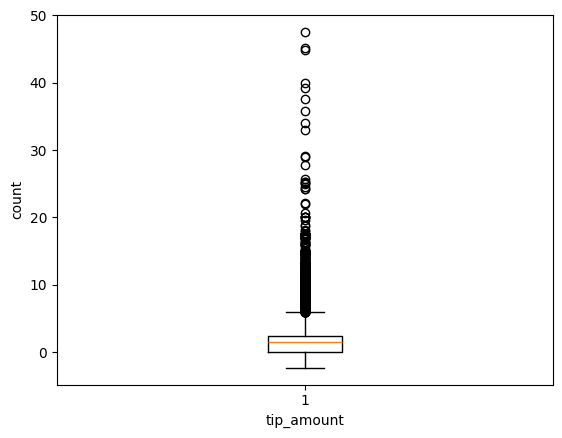

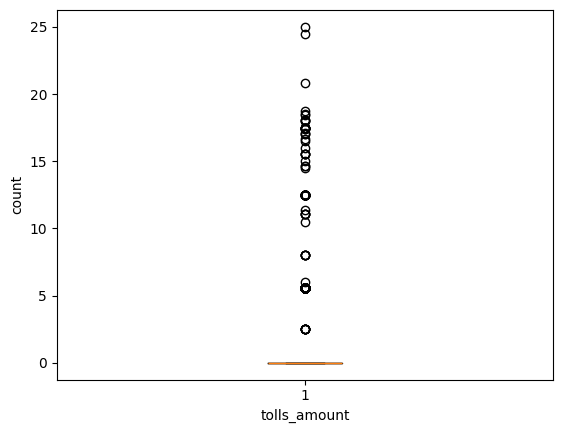

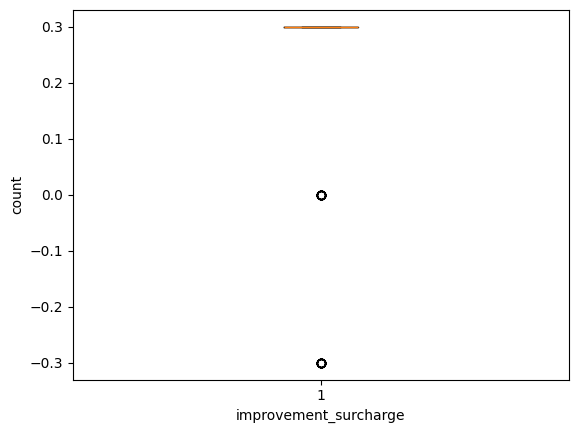

In [16]:
# outliers::
for i in data.columns:
    if i!="total_amount":
     plt.boxplot(data[i])
     plt.xlabel(i)
     plt.ylabel("count")
     plt.show()


In [17]:
# Removing outliers::
l=["passenger_count","trip_distance","fare_amount","tip_amount","tolls_amount"]
for i in l:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    data=data[(data[i]>=LL)&(data[i]<=UL)]
data

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,2.50,-73.976746,40.765152,0,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35
1,0,1,2.90,-73.983482,40.767925,0,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35
8,0,1,0.70,-73.958221,40.764641,0,-73.967896,40.762901,1,5.5,0.5,0.5,2.00,0.0,0.3,8.80
10,1,2,0.54,-73.988426,40.764160,0,-73.992393,40.758224,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30
11,0,1,1.70,-73.969818,40.797428,0,-73.943771,40.796200,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,1,1,3.72,-73.954803,40.767250,0,-73.989449,40.735130,1,14.5,0.0,0.5,3.06,0.0,0.3,18.36
29991,1,1,0.77,-73.954582,40.789650,0,-73.966637,40.793442,1,4.5,0.0,0.5,0.80,0.0,0.3,6.10
29992,1,2,1.38,-73.986305,40.755611,0,-73.983498,40.767548,1,8.5,0.0,0.5,2.32,0.0,0.3,11.62
29995,1,1,0.76,-73.959244,40.771839,0,-73.950089,40.776001,1,6.5,0.0,0.5,1.46,0.0,0.3,8.76


In [18]:
data.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [19]:
data.dropna(inplace=True)

In [20]:
# shape of DataFrame after removing outliers::
data.shape

(21112, 16)

In [21]:
data.drop(columns=["dropoff_longitude"],inplace=True)

In [22]:
data.drop(columns=["pickup_latitude"],inplace=True)

In [23]:
data.drop(columns=["improvement_surcharge"],inplace=True)

In [24]:
data.drop(columns=["dropoff_latitude"],inplace=True)

In [25]:
data.drop(columns=["mta_tax"],inplace=True)

In [26]:
data.drop(columns=["pickup_longitude"],inplace=True)

In [27]:
data.drop(columns=["RatecodeID"],inplace=True)

In [28]:
data.drop(columns=["fare_amount"],inplace=True)

In [29]:
data.drop(columns=["VendorID"],inplace=True)

In [30]:

data

,passenger_count,trip_distance,payment_type,extra,tip_amount,tolls_amount,total_amount
0,1,2.50,1,0.5,2.05,0.0,12.35
1,1,2.90,1,0.5,3.05,0.0,15.35
8,1,0.70,1,0.5,2.00,0.0,8.80
10,2,0.54,2,0.5,0.00,0.0,5.30
11,1,1.70,2,0.5,0.00,0.0,9.30
...,...,...,...,...,...,...,...
29990,1,3.72,1,0.0,3.06,0.0,18.36
29991,1,0.77,1,0.0,0.80,0.0,6.10
29992,2,1.38,1,0.0,2.32,0.0,11.62
29995,1,0.76,1,0.0,1.46,0.0,8.76


In [31]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(y)

0        12.35
1        15.35
8         8.80
10        5.30
11        9.30
         ...  
29990    18.36
29991     6.10
29992    11.62
29995     8.76
29997    21.36
Name: total_amount, Length: 21112, dtype: float64


In [32]:
data

,passenger_count,trip_distance,payment_type,extra,tip_amount,tolls_amount,total_amount
0,1,2.50,1,0.5,2.05,0.0,12.35
1,1,2.90,1,0.5,3.05,0.0,15.35
8,1,0.70,1,0.5,2.00,0.0,8.80
10,2,0.54,2,0.5,0.00,0.0,5.30
11,1,1.70,2,0.5,0.00,0.0,9.30
...,...,...,...,...,...,...,...
29990,1,3.72,1,0.0,3.06,0.0,18.36
29991,1,0.77,1,0.0,0.80,0.0,6.10
29992,2,1.38,1,0.0,2.32,0.0,11.62
29995,1,0.76,1,0.0,1.46,0.0,8.76


In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Handle non-numeric values in the 'payment_type' column
data['payment_type'] = pd.to_numeric(data['payment_type'], errors='coerce')

# Feature Generation
data['distance_per_passenger'] = data['trip_distance'] / data['passenger_count']
data['tip_percentage'] = (data['tip_amount'] / data['total_amount']) * 100

# Drop rows with missing values
data.dropna(inplace=True)

# Feature Selection
X = data.drop(columns=['total_amount'])  # Features
y = data['total_amount']  # Target variable
selector = SelectKBest(score_func=f_regression, k=5)  # Example: Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get indices of top 5 selected features
selected_indices = selector.get_support(indices=True)

# Get corresponding feature names
selected_features = X.columns[selected_indices]

# Print top 5 selected features
print("Top 5 selected features:")
for feature in selected_features:
    print(feature)


Top 5 selected features:
trip_distance
payment_type
tip_amount
distance_per_passenger
tip_percentage


In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [35]:
# linear regression model:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train,y_train)
pred1=le.predict(X_test)
pred1

array([15.42009468, 22.6444754 , 21.60741047, ...,  9.20472615,
       10.78973588, 22.52593077])

In [36]:
r2=r2_score(y_test,pred1)
print("r2_score=",r2)
mae=mean_absolute_error(y_test,pred1)
print("mean_absolute_error=",mae)
mse=mean_squared_error(y_test,pred1)
print("mean_squared_error=",mse)
rmse=np.sqrt(mean_squared_error(y_test,pred1))
print("rmse=",rmse)

r2_score= 0.8888097089853652
mean_absolute_error= 1.0449874909944374
mean_squared_error= 2.145629777135399
rmse= 1.4647968381777041


In [37]:
# Decision tree regression model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred2=dt.predict(X_test)
pred2

array([14.76      , 19.3       , 18.59      , ...,  8.50833333,
        9.3       , 20.3       ])

In [38]:
r2=r2_score(y_test,pred2)
print("r2_score=",r2)
mae=mean_absolute_error(y_test,pred2)
print("mean_absolute_error=",mae)
mse=mean_squared_error(y_test,pred2)
print("mean_squared_error=",mse)
rmse=np.sqrt(mean_squared_error(y_test,pred2))
print("rmse=",rmse)

r2_score= 0.9371690542620178
mean_absolute_error= 0.4766608554904946
mean_squared_error= 1.2124435224587118
rmse= 1.101110131848178


In [39]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred3=rf.predict(X_test)
pred3

array([14.76      , 19.33      , 18.6371    , ...,  8.47611224,
       10.57675   , 20.31      ])

In [40]:
r2=r2_score(y_test,pred2)
print("r2_score=",r2)
mae=mean_absolute_error(y_test,pred2)
print("mean_absolute_error=",mae)
mse=mean_squared_error(y_test,pred2)
print("mean_squared_error=",mse)
rmse=np.sqrt(mean_squared_error(y_test,pred2))
print("rmse=",rmse)

r2_score= 0.9371690542620178
mean_absolute_error= 0.4766608554904946
mean_squared_error= 1.2124435224587118
rmse= 1.101110131848178


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Select features and target variable
X = data[['passenger_count', 'trip_distance']]  # Adjust features as needed
y = data['total_amount']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
r2=r2_score(y_test, y_pred)
print("r2_score=",r2)
mae=mean_absolute_error(y_test, y_pred)
print("mean_absolute_error=",mae)
mse=mean_squared_error(y_test, y_pred)
print("mean_squared_error=",mse)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse=",rmse)

r2_score= 0.7331492799630404
mean_absolute_error= 1.711903317535545
mean_squared_error= 5.149396100473933
rmse= 2.2692280847182227


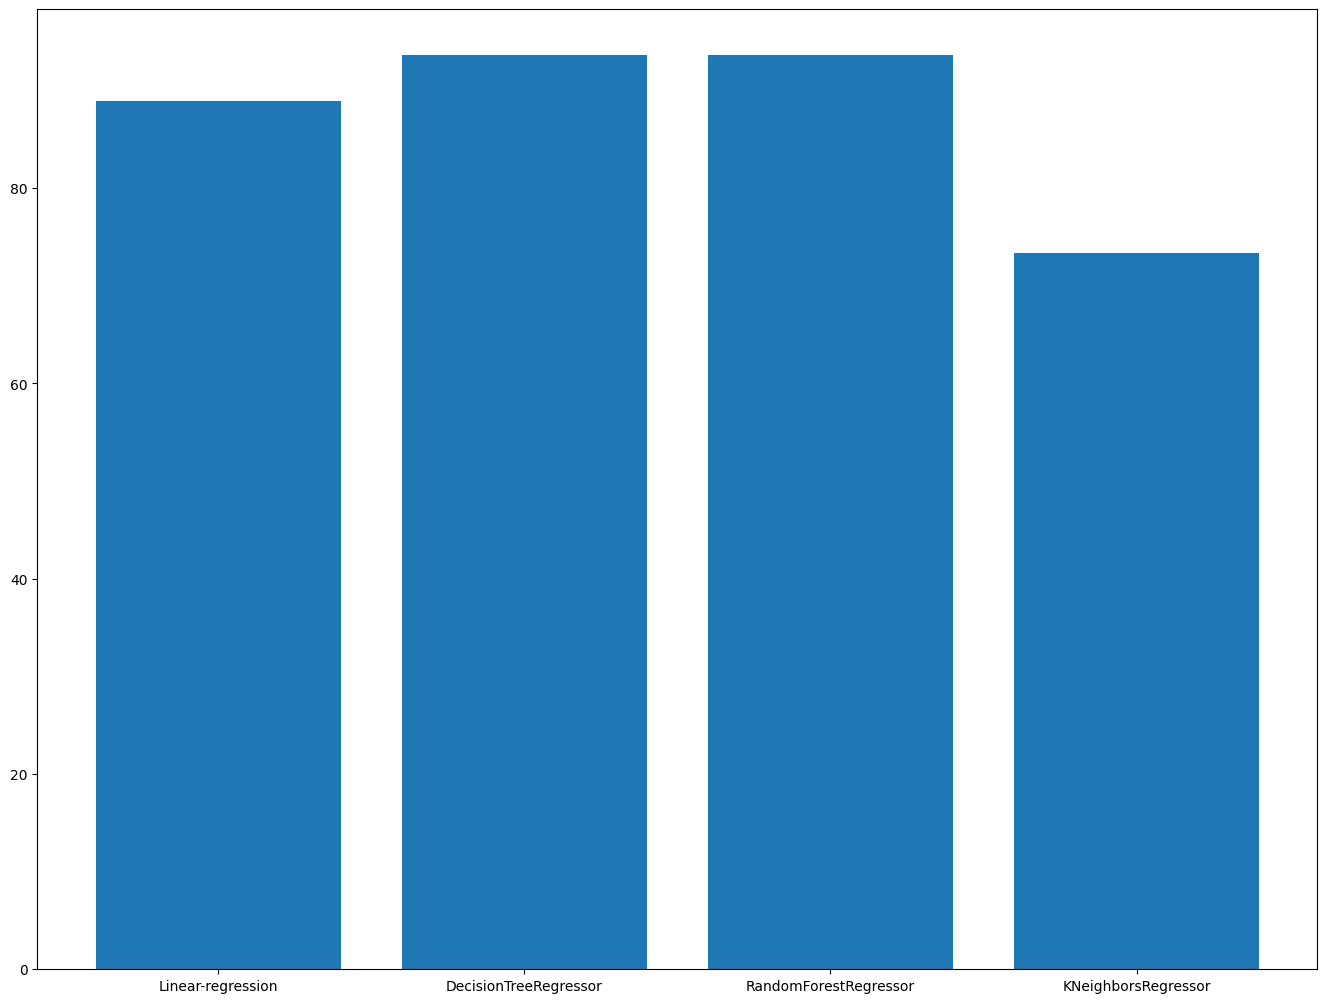

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
models = ['Linear-regression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor']
accuracy = [88.88,93.64,93.64,73.31]
ax.bar(models,accuracy)
plt.show()